Testing frames 200 to 1200 (n=1001)


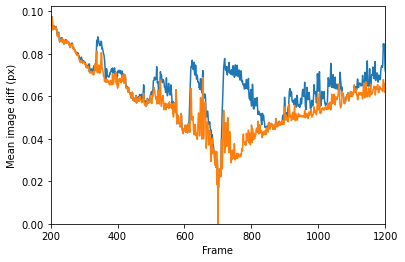

In [3]:
import matplotlib.pyplot as plt
import navbench
from navbench import improc as ip

FRAME_DIST  = 500
IMSIZE      = (180, 55)
FR_STEP     = 1
FRAME       = 700
RIDF_STEP   = 2

resize = ip.resize(*IMSIZE)

db = navbench.Database('bottom_of_campus/straight_route2_fwd')

# IDF vs RIDF for every frame
db.plot_idfs_frames(FRAME, FRAME_DIST, resize, FR_STEP, RIDF_STEP)

Testing frames 200 to 1200 (n=101)
Testing frames 200 to 1200 (n=101)


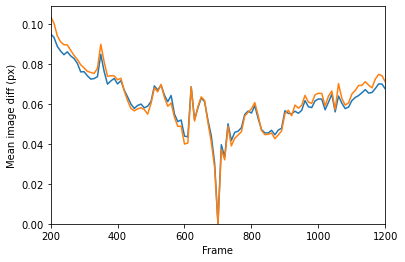

In [2]:
import matplotlib.pyplot as plt
import navbench as nb
from navbench import improc as ip

FRAME_DIST  = 500
IMSIZE      = (180, 55)
FR_STEP     = 10 # Every 10th frame
FRAME       = 700
RIDF_STEP   = 2

resize = ip.resize(*IMSIZE)
histeq = ip.chain(resize, ip.histeq)

db = nb.Database('bottom_of_campus/straight_route2_fwd')
(images1, snap1, entries) = db.get_test_frames(FRAME, FRAME_DIST, resize, FR_STEP)
(images2, snap2, _) = db.get_test_frames(FRAME, FRAME_DIST, histeq, FR_STEP)
diffs1 = nb.get_route_ridf(images1, snap1, FR_STEP)
diffs2 = nb.get_route_ridf(images2, snap2, FR_STEP)

# Plot normal images (blue) vs histeq'd ones (red)
nb.plot_route_idf(entries, diffs1, diffs2)

Testing for (720, 220)
Testing frames 200 to 1200 (n=101)
Testing for (180, 55)
Testing frames 200 to 1200 (n=101)
Testing for (45, 13)
Testing frames 200 to 1200 (n=101)
Testing for (22, 6)
Testing frames 200 to 1200 (n=101)


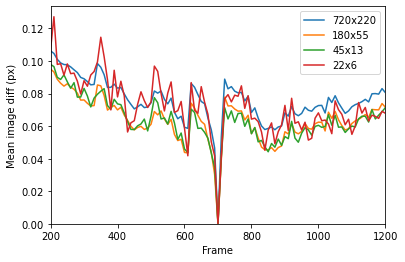

In [6]:
import matplotlib.pyplot as plt
import navbench as nb
from navbench import improc as ip

FRAME_DIST  = 500
FR_STEP     = 10
FRAME       = 700
RIDF_STEP   = 2

sizes = [(720, 220), (180, 55), (45, 13), (22, 6)]

db = nb.Database('bottom_of_campus/straight_route2_fwd')

diffs = []
for size in sizes:
    print("Testing for", size)
    resize = ip.resize(*size)
    (images, snap, entries) = db.get_test_frames(FRAME, FRAME_DIST, resize, FR_STEP)
    diffs.append(nb.get_route_idf(images, snap))

labels = ["%ix%i" % size for size in sizes]

# Plot comparing image difference for images of different sizes
nb.plot_route_idf(entries, *diffs, labels=labels)
plt.show()